In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv')

# Define features (X) and target (y)
# The target is the continuous 'Automation Risk (%)' column
X = df.drop(['Job Title', 'Automation Risk (%)'], axis=1)
y = df['Automation Risk (%)']

# Identify categorical and numerical features
categorical_features = ['Industry', 'Job Status', 'AI Impact Level', 'Required Education', 'Location']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a preprocessing pipeline for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation for regression is complete.")

Data preparation for regression is complete.


Linear Regression Results:
R-squared: -0.00
Mean Squared Error: 847.27


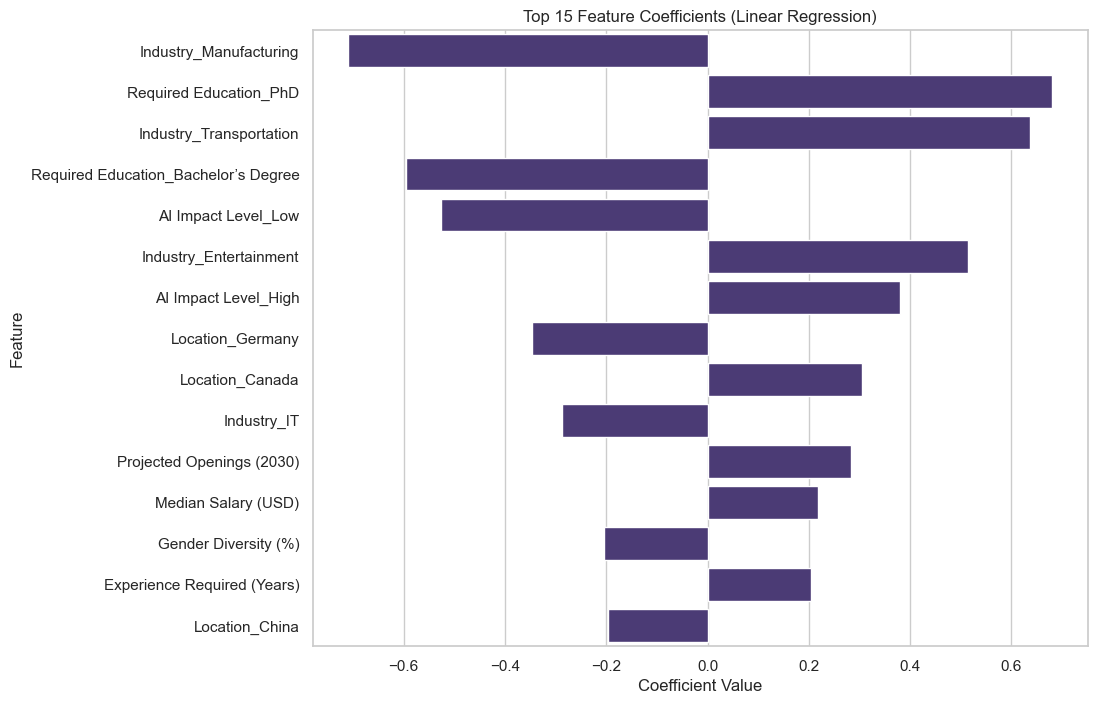

In [28]:
from sklearn.linear_model import LinearRegression

# Create the model pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print(f"R-squared: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
# --- Add this after training the Linear Regression pipeline ---

# Access the regressor and preprocessor
lr_regressor = lr_pipeline.named_steps['regressor']
preprocessor = lr_pipeline.named_steps['preprocessor']

# Get feature names from the preprocessor
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_features])

# Create a series with the coefficients
coefficients = pd.Series(lr_regressor.coef_, index=all_feature_names)

# Sort by absolute value to see the most impactful features
top_coefficients = coefficients.abs().sort_values(ascending=False).head(15)
top_features_sorted = coefficients[top_coefficients.index]


# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features_sorted.values, y=top_features_sorted.index)
plt.title('Top 15 Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Create the model pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor(random_state=42))])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Results:")
print(f"R-squared: {r2_score(y_test, y_pred_dt):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.2f}")

Decision Tree Regressor Results:
R-squared: -0.94
Mean Squared Error: 1646.14


Random Forest Regressor Results:
R-squared: -0.02
Mean Squared Error: 864.75


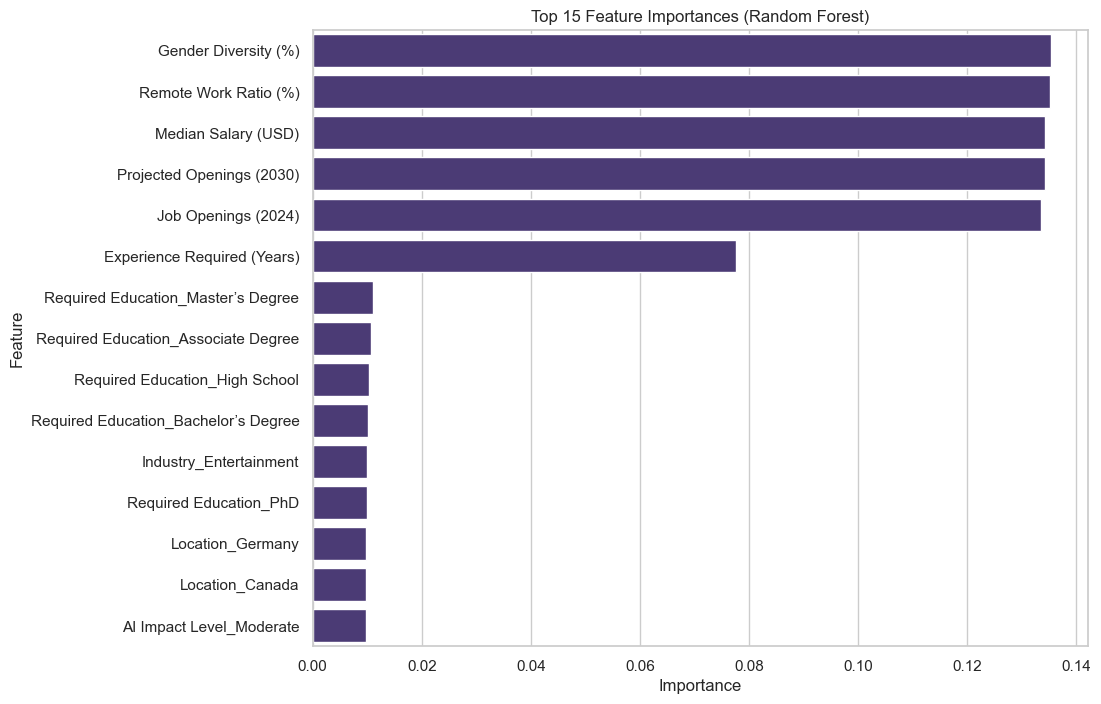

In [26]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Create the model pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Results:")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
# --- Add this code after training the Random Forest Regressor ---

# Access the trained regressor and the preprocessor from the pipeline
rf_regressor = rf_pipeline.named_steps['regressor']
preprocessor = rf_pipeline.named_steps['preprocessor']

# Get feature names from the preprocessor
# It's a bit complex because of one-hot encoding
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_features])

# Create a series with feature importances
importances = pd.Series(rf_regressor.feature_importances_, index=all_feature_names)

# Sort and plot the top 15 features
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [22]:
import xgboost as xgb

# Create the model pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                                              eval_metric='rmse',
                                                              random_state=42))])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
print("XGBoost Regressor Results:")
print(f"R-squared: {r2_score(y_test, y_pred_xgb):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb):.2f}")

XGBoost Regressor Results:
R-squared: -0.07
Mean Squared Error: 904.49


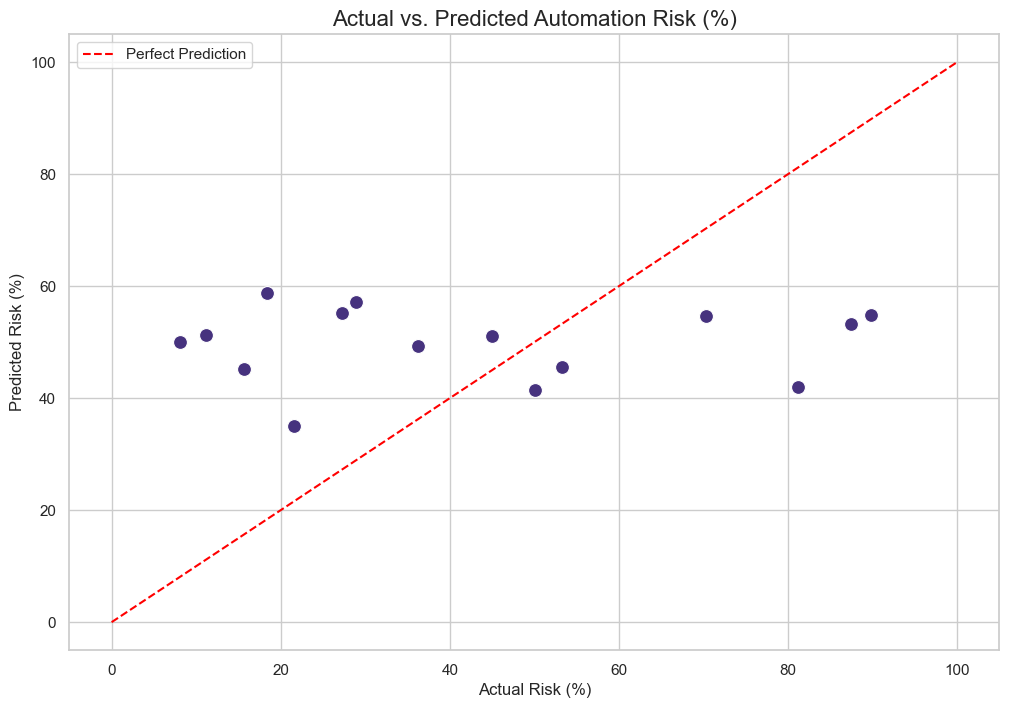

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({'Actual Risk (%)': y_test, 'Predicted Risk (%)': y_pred_xgb})
results_df['Job Title'] = X_test.index # Assuming index corresponds to Job Title if you set it

# Take a sample to visualize
sample_results = results_df.sample(15, random_state=42)
sample_results = sample_results.sort_values('Actual Risk (%)')


# Create the plot
plt.figure(figsize=(12, 8))
# Plotting actual vs predicted as points
sns.scatterplot(data=sample_results, x='Actual Risk (%)', y='Predicted Risk (%)', s=100)
# Plotting a line for perfect prediction
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Automation Risk (%)', fontsize=16)
plt.xlabel('Actual Risk (%)')
plt.ylabel('Predicted Risk (%)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from sklearn.svm import SVR

# Create the model pipeline
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', SVR(kernel='rbf'))]) # 'rbf' kernel is good for non-linear data

# Train the model
svr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_pipeline.predict(X_test)

# Evaluate the model
print("Support Vector Regressor (SVR) Results:")
print(f"R-squared: {r2_score(y_test, y_pred_svr):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svr):.2f}")

Support Vector Regressor (SVR) Results:
R-squared: -0.01
Mean Squared Error: 851.26


In [32]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

try:
    # STEP 1: Load your dataset
    df = pd.read_csv(r'C:\Users\Ashita SHARMA\Desktop\Datascience Project\datasets\automation 1.1.csv')

    # STEP 2: Prepare the data (same as before)
    X = df.drop(columns=['Job Title', 'Automation Risk (%)'])
    y = df['Automation Risk (%)']

    categorical_features = X.select_dtypes(include=['object']).columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # STEP 3: Build and train the XGBoost model
    # We are swapping RandomForestRegressor with xgb.XGBRegressor
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # STEP 4: Make predictions
    y_pred = model.predict(X_test)

    # STEP 5: Calculate performance metrics
    # Remember to focus on RMSE and Correlation, not MAPE!
    errors = y_test - y_pred
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    corr = np.corrcoef(y_test, y_pred)[0, 1]

    # STEP 6: Display the results
    print("--- XGBoost Model Performance Metrics ---")
    print(f"{'Metric':<45} {'Value'}")
    print("-" * 55)
    print(f"{'Mean Absolute Error (MAE)':<45} {mae:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<45} {rmse:.4f}")
    print(f"{'Correlation (Actual vs. Forecast)':<45} {corr:.4f}")
    print("-" * 55)

except FileNotFoundError:
    print("Error: The file 'automation 1.1.csv' was not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

--- XGBoost Model Performance Metrics ---
Metric                                        Value
-------------------------------------------------------
Mean Absolute Error (MAE)                     25.7372
Root Mean Squared Error (RMSE)                30.0747
Correlation (Actual vs. Forecast)             0.0195
-------------------------------------------------------
